# Setup

In [1]:
import numpy as np
import random

import os

from PIL import Image
from IPython.display import display

# Data

At first, all files from the image folder are extracted. Afterwards, a list with all directories is created.

In [2]:
path = '/home/emanuel/data_folder/images_folder/'
file_list = os.listdir(str(path))
print(len(file_list))

9420


In [3]:
path_list = []
for i in range(0, len(file_list)-1):
    temp = str(path + file_list[i])
    path_list.append(temp)

The following function plots one example image from the data set.

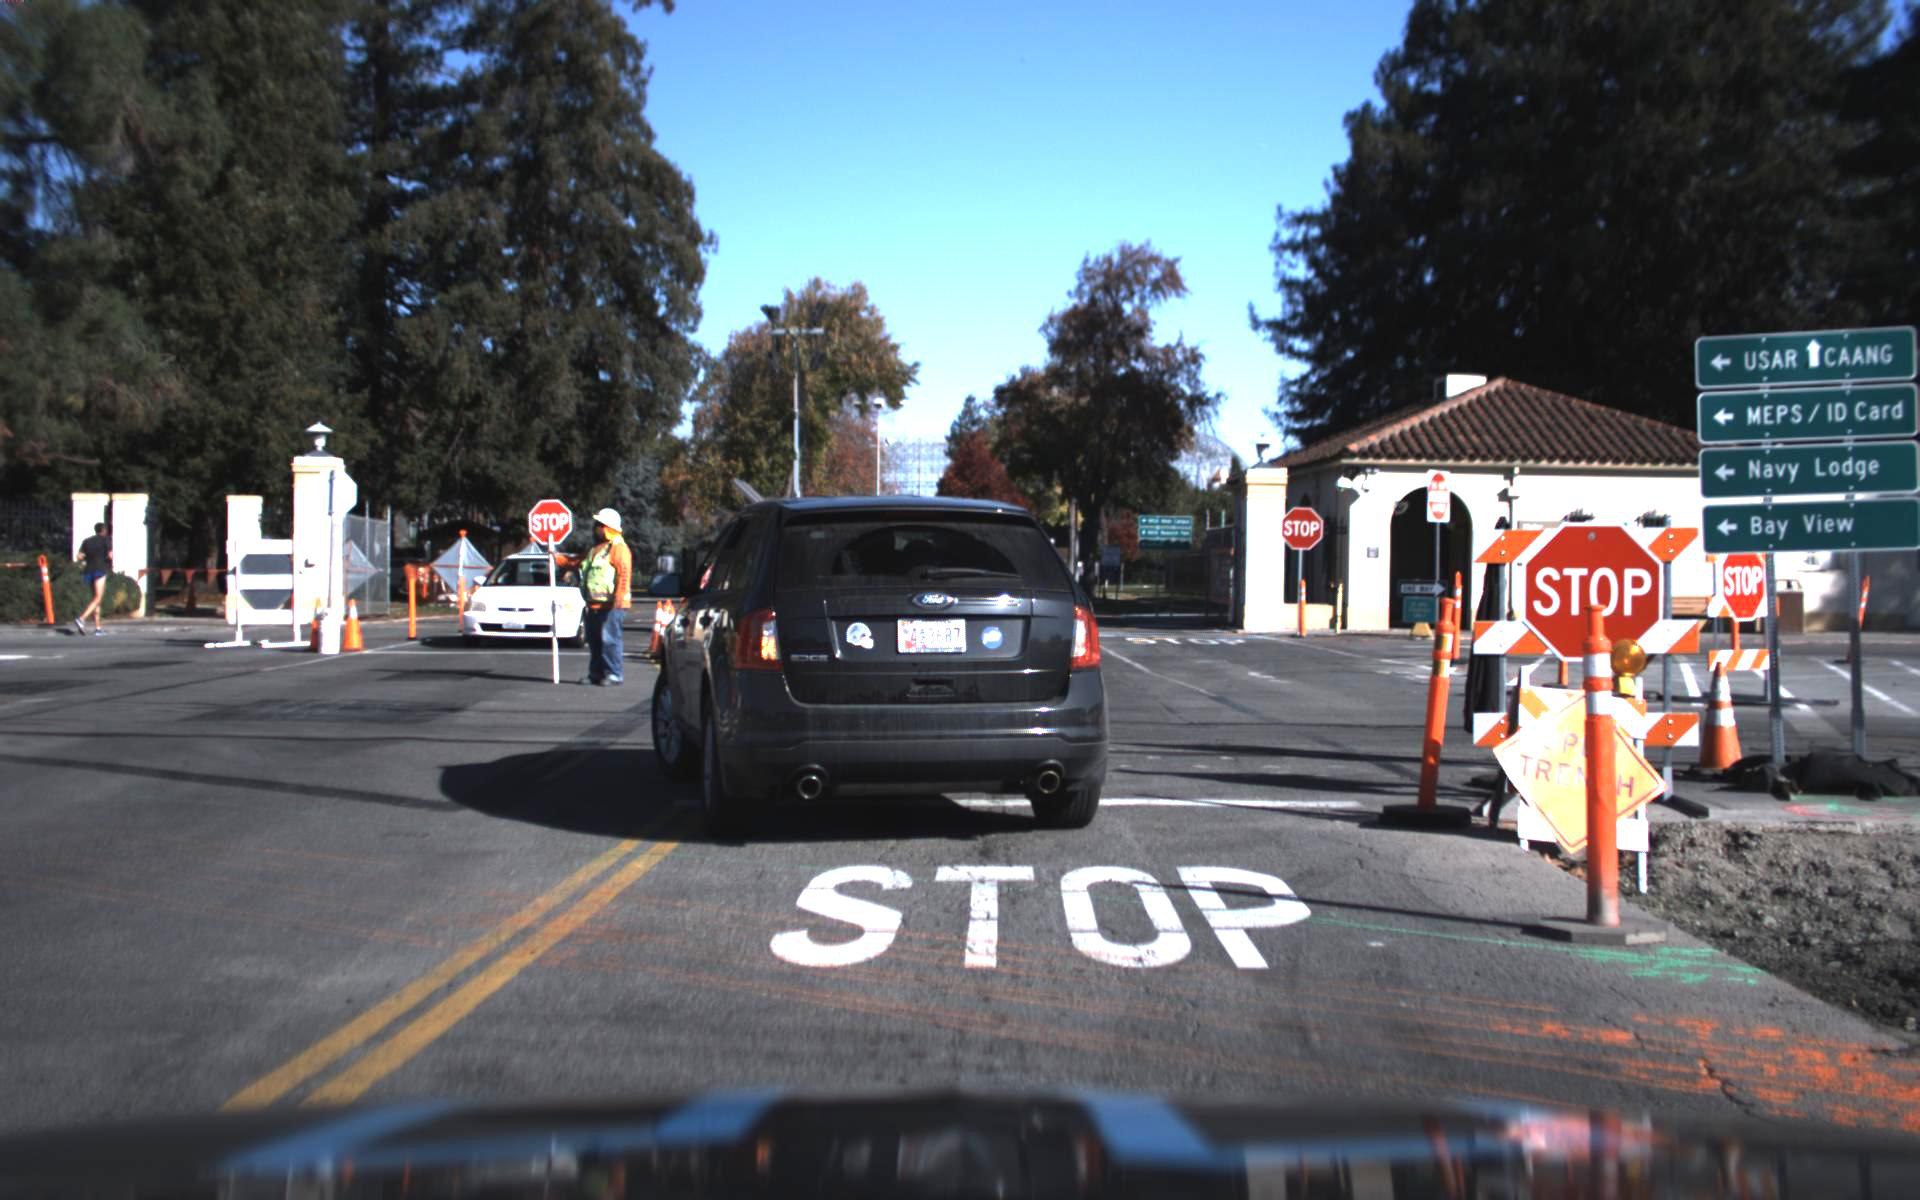

In [4]:
def show_image(files=path_list, nr_imgs=9420):
    ind = random.randint(0, nr_imgs)
    file = files[ind]
    img = Image.open(file)
    display(img)

show_image()

The next function loads all the images and converts them to a numpy array.

In [5]:
def load_data(files=path_list, nr_imgs=9420):
    rd_ind = random.sample(range(0,9419), nr_imgs)
    i = 0
    img_vec = []
    while i <= nr_imgs-1:
        temp = Image.open(files[rd_ind[i]])
        pix = np.array(temp)
        img_vec.append(pix)
        temp.close() 
        i += 1
    return img_vec

img_vec = load_data(nr_imgs=4)
print(len(img_vec))

4


In [6]:
np.save("data.npy", img_vec)